<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.nus.edu.sg/images/default-source/base/logo.png' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Machine Learning in Python</h1><h2>Lab 4a - Support Vector Machine </h2><h3></h3></th>
    </tr>
</table>

In [1]:
# Import the requried packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model, neighbors, tree, svm, ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_validate

### 1.Classification

We will be using the bank marketing campaign data for classification task. We take a small sample (3000 records) to train the model as SVM model takes longer time to train. Feel free to practice at home using the full dataset. 

In [2]:
# Loading the data
bank = pd.read_csv('bank.csv')
print(bank.head())
# Encode the categorical data into numbers
bank_cat = bank.select_dtypes(['object']).copy()
for col in bank_cat:
    print(col, ':')
    codes, uniques = pd.factorize(bank_cat[col], sort=True)
    bank[col]=codes
    print(uniques)
print(bank.head())

# Sample a small subset of the data
bank = bank.sample(3000, random_state =5)
print('\n samples by target categories:')
print(bank.deposit.value_counts())
  
# Set the "deposit" as target/model output and the rest features as model inputs
y = bank['deposit']
X = bank.drop(['deposit'], axis=1)

# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#Sacaling the data into a smaller range (-3 to +3)
mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std


   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  
job :
Index(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 

#### 1.1 Linear Kernel

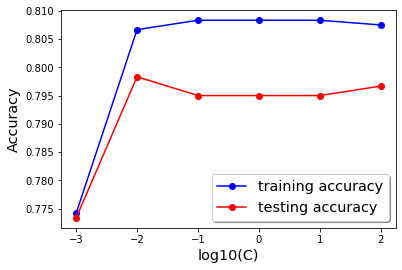

In [3]:
# Find the best C
C_range = [0.001, 0.01, 0.1, 1, 10, 100]

train_accuracy = []
test_accuracy = []

for C in C_range:
    svm_clf = svm.SVC(kernel="linear", C=C) # svm.LinearSVC() run much faster
    svm_clf.fit(X_train, y_train) 
    train_accuracy.append(svm_clf.score(X_train, y_train))
    test_accuracy.append(svm_clf.score(X_test, y_test))
    
#Plot the train & test accuracy
plt.plot(np.log10(C_range), train_accuracy, 'bo-', label ='training accuracy')
plt.plot(np.log10(C_range), test_accuracy, 'ro-', label = 'testing accuracy')

plt.xlabel('log10(C)', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [4]:
#Final Model
svm_clf = svm.SVC(kernel="linear", C=0.01)
svm_clf.fit(X_train, y_train)

SVC(C=0.01, kernel='linear')

In [5]:
print('train_acc:', svm_clf.score(X_train, y_train), 
      '\n test_acc:', svm_clf.score(X_test, y_test))

train_acc: 0.8066666666666666 
 test_acc: 0.7983333333333333


#### 1.2 Polynomial Kernel

In [6]:
# Use GridSearch to find the best combination of model hyperparameters
from sklearn.model_selection import GridSearchCV

svm_clf = svm.SVC(kernel="poly")

param_grid = {"degree" : [0,1,2, 3, 4, 5], 
              "coef0" : [0,1], #coef0 controls how much the model is influenced by highdegree polynomials versus low-degree polynomials
              'C' : [0.001, 0.01, 0.1, 1, 10, 100]}

gs_clf = GridSearchCV(svm_clf, param_grid=param_grid, scoring='accuracy', cv= 5, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'coef0': [0, 1],
                         'degree': [0, 1, 2, 3, 4, 5]},
             scoring='accuracy')

In [7]:
print(gs_clf.best_score_)
print(gs_clf.best_params_)
print(gs_clf.best_estimator_)

0.81375
{'C': 10, 'coef0': 1, 'degree': 2}
SVC(C=10, coef0=1, degree=2, kernel='poly')


In [8]:
#Final Model
svm_clf = gs_clf.best_estimator_
svm_clf.fit(X_train, y_train)

print('train_acc:', svm_clf.score(X_train, y_train), 
      '\n test_acc:', svm_clf.score(X_test, y_test))

train_acc: 0.8416666666666667 
 test_acc: 0.805


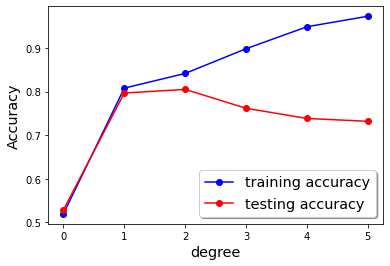

In [9]:
# Understand the impact of degree
degree_range = [0, 1,2, 3, 4,5]

train_accuracy = []
test_accuracy = []

for d in degree_range:
    svm_clf = svm.SVC(kernel="poly", C=10, degree =d, coef0=1)
    svm_clf.fit(X_train, y_train) 
    train_accuracy.append(svm_clf.score(X_train, y_train))
    test_accuracy.append(svm_clf.score(X_test, y_test))
    
#Plot the train & test accuracy
plt.plot(degree_range, train_accuracy, 'bo-', label ='training accuracy')
plt.plot(degree_range, test_accuracy, 'ro-', label = 'testing accuracy')

plt.xlabel('degree', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

#### 1.3 RBF Kernel

In [10]:
# Use GridSearch to find the best combination of model hyperparameters
from sklearn.model_selection import GridSearchCV

svm_clf = svm.SVC(kernel="rbf")

param_grid = {"gamma" : [0.01,0.1, 1, 10, 100], 
              'C' : [0.001, 0.01, 0.1, 1, 10, 100]}

gs_clf2 = GridSearchCV(svm_clf, param_grid=param_grid, scoring='accuracy', cv= 5, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs_clf2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [11]:
print(gs_clf2.best_score_)
print(gs_clf2.best_params_)
print(gs_clf2.best_estimator_)

0.8154166666666667
{'C': 10, 'gamma': 0.01}
SVC(C=10, gamma=0.01)


In [12]:
#Final Model
svm_clf = gs_clf2.best_estimator_
svm_clf.fit(X_train, y_train)

print('train_acc:', svm_clf.score(X_train, y_train), 
      '\n test_acc:', svm_clf.score(X_test, y_test))

train_acc: 0.83375 
 test_acc: 0.825


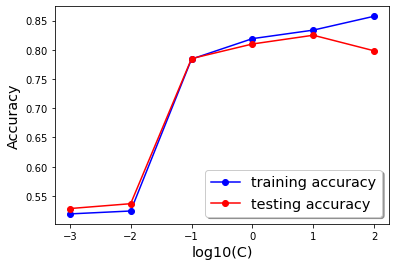

In [13]:
# Understand the impact of C
C_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_accuracy = []
test_accuracy = []

for C in C_range:
    svm_clf = svm.SVC(kernel="rbf", gamma=0.01, C=C)
    svm_clf.fit(X_train, y_train) 
    train_accuracy.append(svm_clf.score(X_train, y_train))
    test_accuracy.append(svm_clf.score(X_test, y_test))
    
#Plot the train & test accuracy
plt.plot(np.log10(C_range), train_accuracy, 'bo-', label ='training accuracy')
plt.plot(np.log10(C_range), test_accuracy, 'ro-', label = 'testing accuracy')

plt.xlabel('log10(C)', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

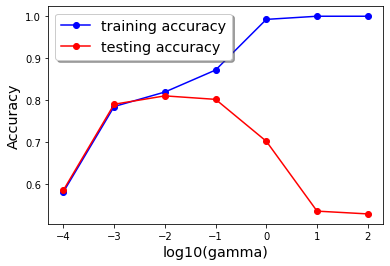

In [14]:
# Understand the impact of gamma
g_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
train_accuracy = []
test_accuracy = []

for g in g_range:
    svm_clf = svm.SVC(kernel="rbf", gamma=g, C=1)
    svm_clf.fit(X_train, y_train) 
    train_accuracy.append(svm_clf.score(X_train, y_train))
    test_accuracy.append(svm_clf.score(X_test, y_test))
    
#Plot the train & test accuracy
plt.plot(np.log10(g_range), train_accuracy, 'bo-', label ='training accuracy')
plt.plot(np.log10(g_range), test_accuracy, 'ro-', label = 'testing accuracy')

plt.xlabel('log10(gamma)', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

### 3. Regression
We will be using the supermarket data for regression task. We take a small sample (3000 records) to train the model as SVM model takes longer time to train. Feel free to practice at home using the full dataset. 

In [15]:
# Loading the data
supermarket = pd.read_csv('supermarket.csv')
print(supermarket.head())

# Encode the categorical data into numbers
supermarket_cat = supermarket.select_dtypes(['object']).copy()
for col in supermarket_cat:
    print(col, ':')
    codes, uniques = pd.factorize(supermarket_cat[col], sort=True)
    supermarket[col]=codes
    print(uniques)
print(supermarket.head())

# Sample a small subset of the data
supermarket = supermarket.sample(3000, random_state =5)


# Set the "Sales" as target/model output and the rest features as model inputs
y = supermarket['Item_Outlet_Sales']
X = supermarket.drop(['Item_Outlet_Sales'], axis=1)

# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#Sacaling the data into a smaller range (-3 to +3)
mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

   Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30          Low Fat         0.016047                  Dairy   
1         5.92          Regular         0.019278            Soft Drinks   
2        17.50          Low Fat         0.016760                   Meat   
3        19.20          Regular         0.000000  Fruits and Vegetables   
4         8.93          Low Fat         0.000000              Household   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   
1   48.2692            OUT018                       2009      Medium   
2  141.6180            OUT049                       1999      Medium   
3  182.0950            OUT010                       1998         NaN   
4   53.8614            OUT013                       1987        High   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1          37

In [16]:
# Use GridSearch to find the best combination of model hyperparameters
from sklearn.model_selection import GridSearchCV

svm_reg = svm.SVR()

param_grid = {"kernel": ['linear', 'rbf'],
              'epsilon': [0.1,1,10, 100],
              "gamma" : [0.001, 0.1, 1, 10], 
              'C' : [0.01, 0.1, 1, 10, 100, 1000]}

gs_reg = GridSearchCV(svm_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 5, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs_reg.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 1, 10, 100],
                         'gamma': [0.001, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [17]:
print(gs_reg.best_score_)
print(gs_reg.best_params_)
print(gs_reg.best_estimator_)

-1008932.3553691212
{'C': 1000, 'epsilon': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVR(C=1000, epsilon=100, gamma=0.1)


In [18]:
#Final Model
svm_reg = gs_reg.best_estimator_
svm_reg.fit(X_train, y_train)

print('train_mae:', mean_absolute_error(svm_reg.predict(X_train), y_train), 
      '\n test_mae:', mean_absolute_error(svm_reg.predict(X_test), y_test))

train_mae: 661.076745969966 
 test_mae: 701.3404674649514


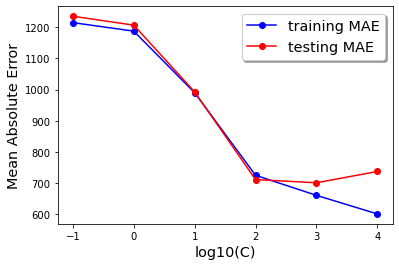

In [19]:
# Understand the impact of C
C_range = [0.1, 1, 10, 100, 1000, 10000]
train_mae = []
test_mae = []

for C in C_range:
    svm_reg = svm.SVR(kernel="rbf",gamma =0.1, C=C, epsilon =100)
    svm_reg.fit(X_train, y_train) 
    train_mae.append(mean_absolute_error(svm_reg.predict(X_train), y_train))
    test_mae.append(mean_absolute_error(svm_reg.predict(X_test), y_test))
    
#Plot the train & test mae
plt.plot(np.log10(C_range), train_mae, 'bo-', label ='training MAE')
plt.plot(np.log10(C_range), test_mae, 'ro-', label = 'testing MAE')

plt.xlabel('log10(C)', fontsize='x-large')
plt.ylabel('Mean Absolute Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

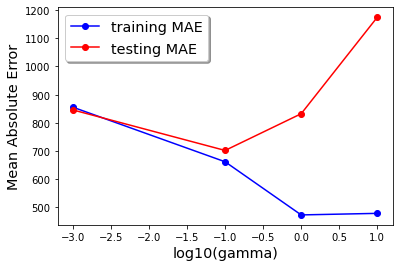

In [20]:
# Understand the impact of gamma
g_range = [0.001, 0.1, 1, 10]
train_mae = []
test_mae = []

for g in g_range:
    svm_reg = svm.SVR(kernel="rbf",gamma=g, C=1000, epsilon =100)
    svm_reg.fit(X_train, y_train) 
    train_mae.append(mean_absolute_error(svm_reg.predict(X_train), y_train))
    test_mae.append(mean_absolute_error(svm_reg.predict(X_test), y_test))
    
#Plot the train & test mae
plt.plot(np.log10(g_range), train_mae, 'bo-', label ='training MAE')
plt.plot(np.log10(g_range), test_mae, 'ro-', label = 'testing MAE')

plt.xlabel('log10(gamma)', fontsize='x-large')
plt.ylabel('Mean Absolute Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

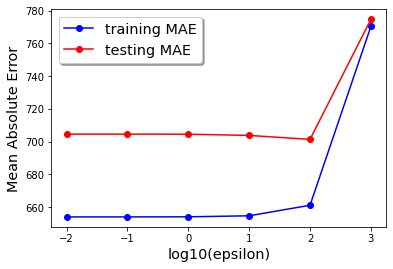

In [21]:
# Understand the impact of epsilon
e_range = [0.01, 0.1,1,10, 100, 1000]
train_mae = []
test_mae = []

for e in e_range:
    svm_reg = svm.SVR(kernel="rbf",gamma =0.1, C=1000, epsilon =e)
    svm_reg.fit(X_train, y_train) 
    train_mae.append(mean_absolute_error(svm_reg.predict(X_train), y_train))
    test_mae.append(mean_absolute_error(svm_reg.predict(X_test), y_test))
    
#Plot the train & test mae
plt.plot(np.log10(e_range), train_mae, 'bo-', label ='training MAE')
plt.plot(np.log10(e_range), test_mae, 'ro-', label = 'testing MAE')

plt.xlabel('log10(epsilon)', fontsize='x-large')
plt.ylabel('Mean Absolute Error', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

### 4. Exercise:
Tuning model hyperparameters for the above two models (classification and regression) and try your best to further improve the model performance. 

### classification

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
# Loading the data
bank = pd.read_csv('bank.csv')
print(bank.head())
# Encode the categorical data into numbers
bank_cat = bank.select_dtypes(['object']).copy()
for col in bank_cat:
    print(col, ':')
    codes, uniques = pd.factorize(bank_cat[col], sort=True)
    bank[col]=codes
    print(uniques)
print(bank.head())

# Sample a small subset of the data
bank = bank.sample(3000, random_state =5)
print('\n samples by target categories:')
print(bank.deposit.value_counts())
  
# Set the "deposit" as target/model output and the rest features as model inputs
y = bank['deposit']
X = bank.drop(['deposit'], axis=1)

# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#Sacaling the data into a smaller range (-3 to +3)
mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std


   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  
job :
Index(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 

In [18]:
# Use GridSearch to find the best combination of model hyperparameters
from sklearn.model_selection import GridSearchCV

svm_clf = svm.SVC(kernel="rbf")

param_grid = {"gamma" : np.arange(0.01, 100), 
              'C' : np.arange(0.01, 100)}

gs_clf2 = GridSearchCV(svm_clf, param_grid=param_grid, scoring='accuracy', cv= 3, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs_clf2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.000e-02, 1.010e+00, 2.010e+00, 3.010e+00, 4.010e+00, 5.010e+00,
       6.010e+00, 7.010e+00, 8.010e+00, 9.010e+00, 1.001e+01, 1.101e+01,
       1.201e+01, 1.301e+01, 1.401e+01, 1.501e+01, 1.601e+01, 1.701e+01,
       1.801e+01, 1.901e+01, 2.001e+01, 2.101e+01, 2.201e+01, 2.301e+01,
       2.401e+01, 2.501e+01, 2.601e+01, 2.701e+01, 2.8...
       6.601e+01, 6.701e+01, 6.801e+01, 6.901e+01, 7.001e+01, 7.101e+01,
       7.201e+01, 7.301e+01, 7.401e+01, 7.501e+01, 7.601e+01, 7.701e+01,
       7.801e+01, 7.901e+01, 8.001e+01, 8.101e+01, 8.201e+01, 8.301e+01,
       8.401e+01, 8.501e+01, 8.601e+01, 8.701e+01, 8.801e+01, 8.901e+01,
       9.001e+01, 9.101e+01, 9.201e+01, 9.301e+01, 9.401e+01, 9.501e+01,
       9.601e+01, 9.701e+01, 9.801e+01, 9.901e+01])},
             scoring='accuracy')

In [19]:
print(gs_clf2.best_score_)
print(gs_clf2.best_params_)
print(gs_clf2.best_estimator_)

0.8120833333333333
{'C': 9.01, 'gamma': 0.01}
SVC(C=9.01, gamma=0.01)


In [20]:
#Final Model
svm_clf = gs_clf2.best_estimator_
svm_clf.fit(X_train, y_train)

print('train_acc:', svm_clf.score(X_train, y_train), 
      '\n test_acc:', svm_clf.score(X_test, y_test))

train_acc: 0.835 
 test_acc: 0.825


### regression

In [2]:
# Loading the data
supermarket = pd.read_csv('supermarket.csv')
print(supermarket.head())

# Encode the categorical data into numbers
supermarket_cat = supermarket.select_dtypes(['object']).copy()
for col in supermarket_cat:
    print(col, ':')
    codes, uniques = pd.factorize(supermarket_cat[col], sort=True)
    supermarket[col]=codes
    print(uniques)
print(supermarket.head())

# Sample a small subset of the data
supermarket = supermarket.sample(3000, random_state =5)


# Set the "Sales" as target/model output and the rest features as model inputs
y = supermarket['Item_Outlet_Sales']
X = supermarket.drop(['Item_Outlet_Sales'], axis=1)

# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#Sacaling the data into a smaller range (-3 to +3)
mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

   Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30          Low Fat         0.016047                  Dairy   
1         5.92          Regular         0.019278            Soft Drinks   
2        17.50          Low Fat         0.016760                   Meat   
3        19.20          Regular         0.000000  Fruits and Vegetables   
4         8.93          Low Fat         0.000000              Household   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   
1   48.2692            OUT018                       2009      Medium   
2  141.6180            OUT049                       1999      Medium   
3  182.0950            OUT010                       1998         NaN   
4   53.8614            OUT013                       1987        High   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1          37

In [3]:
# Use GridSearch to find the best combination of model hyperparameters
from sklearn.model_selection import GridSearchCV

svm_reg = svm.SVR()

param_grid = {"kernel": ['linear', 'rbf'],
              'epsilon': np.arange(0.01, 10, 10),
              "gamma" : np.arange(0.01, 1, 10), 
              'C' : [0.01, 0.1, 1, 10, 100]}

gs_reg = GridSearchCV(svm_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 3, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs_reg.fit(X_train, y_train) 

GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'epsilon': array([0.01]),
                         'gamma': array([0.01]), 'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [4]:
print(gs_reg.best_score_)
print(gs_reg.best_params_)
print(gs_reg.best_estimator_)

-1208196.192461802
{'C': 100, 'epsilon': 0.01, 'gamma': 0.01, 'kernel': 'linear'}
SVR(C=100, epsilon=0.01, gamma=0.01, kernel='linear')


In [5]:
#Final Model
svm_reg = gs_reg.best_estimator_
svm_reg.fit(X_train, y_train)

print('train_mae:', mean_absolute_error(svm_reg.predict(X_train), y_train), 
      '\n test_mae:', mean_absolute_error(svm_reg.predict(X_test), y_test))

train_mae: 835.9870974521267 
 test_mae: 834.0299929798973


In [6]:
# R squared value
svm_reg.score(X_test, y_test)

0.49275264942142094